In [ ]:
import pandas as pd
import numpy as np

# Load your Excel dataset
df = pd.read_csv("/content/drive/MyDrive/EV Project Davise Lab/electric_vehicles_spec_2025.csv.csv")

# Step 1: Extract relevant columns
relevant_columns = [
    'efficiency_wh_per_km',
    'torque_nm',
    'acceleration_0_100_s',
    'drivetrain',
    'top_speed_kmh',
    'battery_capacity_kWh',
    'number_of_cells',
    'segment'
]
df = df[relevant_columns]

# Step 2: Generate synthetic data
num_rows = len(df)

# SoC: 16.2% to 97.1%
df['SoC'] = np.round(np.random.uniform(16.2, 97.1, num_rows), 2)

# Voltage: 360 V to 460 V
df['Voltage'] = np.round(np.random.uniform(360, 460, num_rows), 2)

# Current: -500 A to +1000 A
df['Current'] = np.round(np.random.uniform(-500, 1000, num_rows), 2)

# Temperature: 15°C to 35°C
df['Temperature'] = np.round(np.random.uniform(15, 35, num_rows), 2)

# Discharge Rate: -3.19 to +3.45
df['DischargeRate'] = np.round(np.random.uniform(-3.19, 3.45, num_rows), 3)



In [ ]:
df.head(2)

,efficiency_wh_per_km,torque_nm,acceleration_0_100_s,drivetrain,top_speed_kmh,battery_capacity_kWh,number_of_cells,segment,SoC,Voltage,Current,Temperature,DischargeRate
0,156,235.0,7.0,FWD,155,37.8,192.0,B - Compact,24.66,404.28,644.97,17.78,-2.638
1,149,235.0,7.0,FWD,155,37.8,192.0,B - Compact,29.98,415.05,-197.99,33.34,-1.590


In [ ]:
df.isnull().sum()

,0
efficiency_wh_per_km,0
torque_nm,7
acceleration_0_100_s,0
drivetrain,0
top_speed_kmh,0
battery_capacity_kWh,0
number_of_cells,202
segment,0
SoC,0
Voltage,0


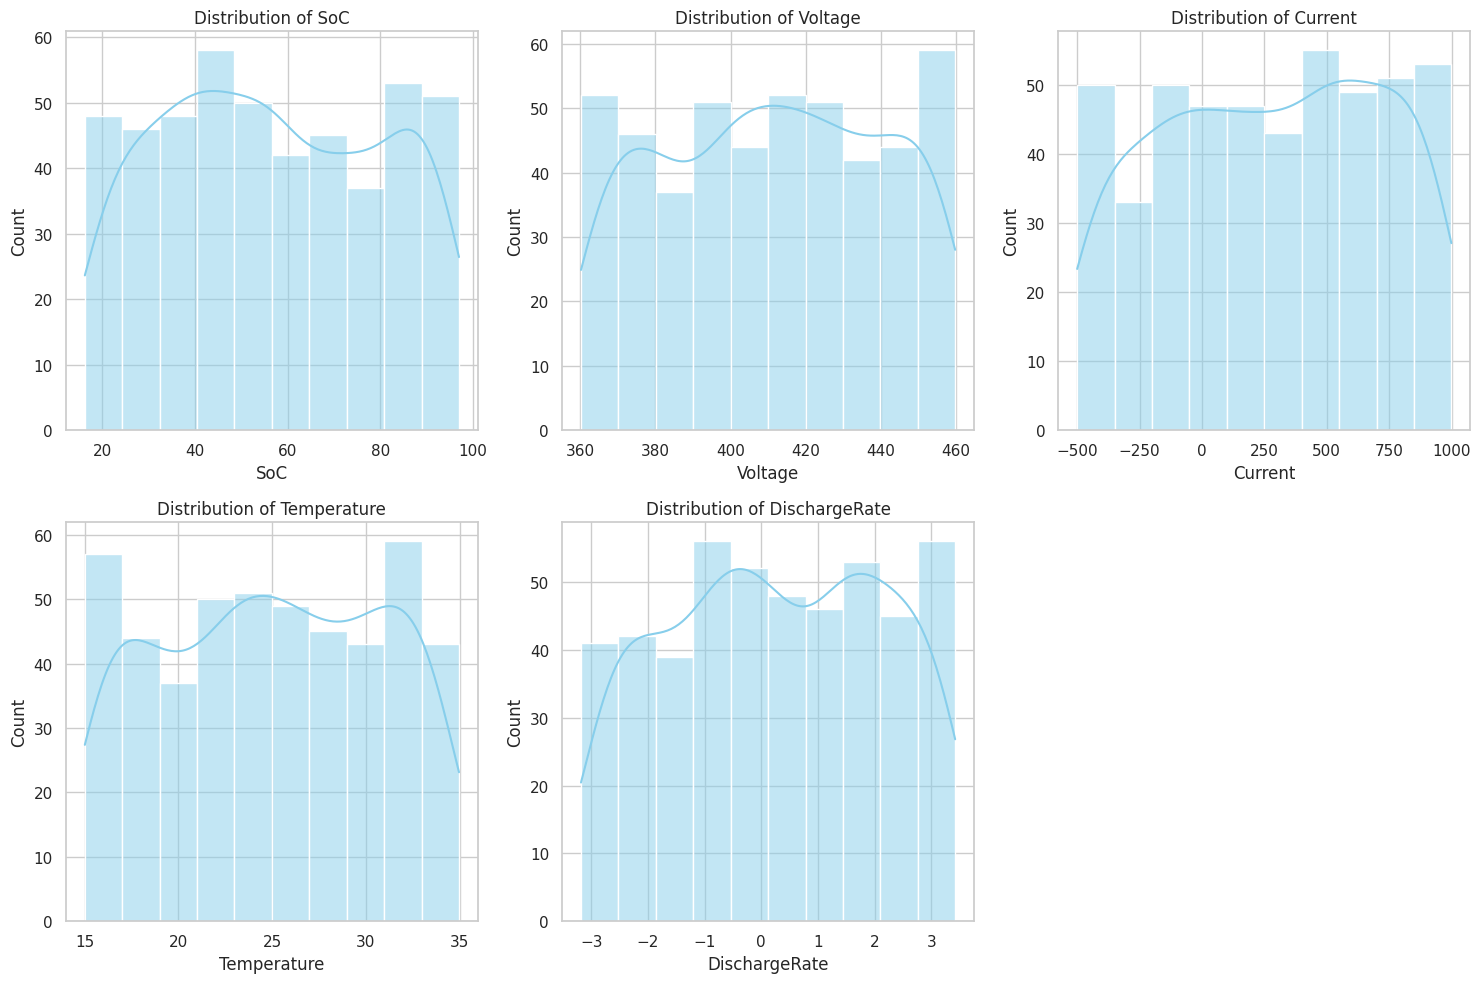

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Distribution of synthetic features
features = ['SoC', 'Voltage', 'Current', 'Temperature', 'DischargeRate']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


## 📊 Histogram Analysis

### 1. **State of Charge (SoC)**
- **Range**: ~20% to ~100%
- **Distribution**: Fairly uniform, with noticeable peaks around **40%** and **80%**
- **Insight**: Your synthetic SoC values are well spread, simulating both low and high charge conditions. This is great for testing discharge behavior across the full battery lifecycle.

---

### 2. **Voltage**
- **Range**: 360 V to 460 V
- **Distribution**: Uniform with peaks around **380 V** and **460 V**
- **Insight**: This suggests a realistic spread across typical EV operating voltages. The peaks may represent common operating points (e.g., idle vs. full charge).

---

### 3. **Current**
- **Range**: –500 A to +1000 A
- **Distribution**: Broad and uniform, with peaks near **500 A** and **750 A**
- **Insight**: This simulates both charging (positive current) and regenerative braking or idle (negative current). The peak at high positive current may reflect acceleration or heavy load conditions.

---

### 4. **Temperature**
- **Range**: 15°C to 35°C
- **Distribution**: Uniform with peaks around **15°C** and **30°C**
- **Insight**: This range covers typical ambient and operating temperatures. The peaks suggest your synthetic data includes both cool and warm conditions, useful for thermal performance modeling.

---

### 5. **Discharge Rate**
- **Range**: –3 to +3
- **Distribution**: Fairly uniform with peaks around **–1** and **+2**
- **Insight**: This shows a mix of charging and discharging behavior. The positive peak indicates frequent discharge events, while the negative side reflects occasional charging or regenerative braking.

---

## ✅ Result
- They confirm your synthetic data is **well-distributed**, not clustered unnaturally.


/tmp/ipython-input-9-3058258681.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['segment', 'x_bin'])[y].mean().reset_index()
/tmp/ipython-input-9-3058258681.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['segment', 'x_bin'])[y].mean().reset_index()
/tmp/ipython-input-9-3058258681.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['segment', 'x

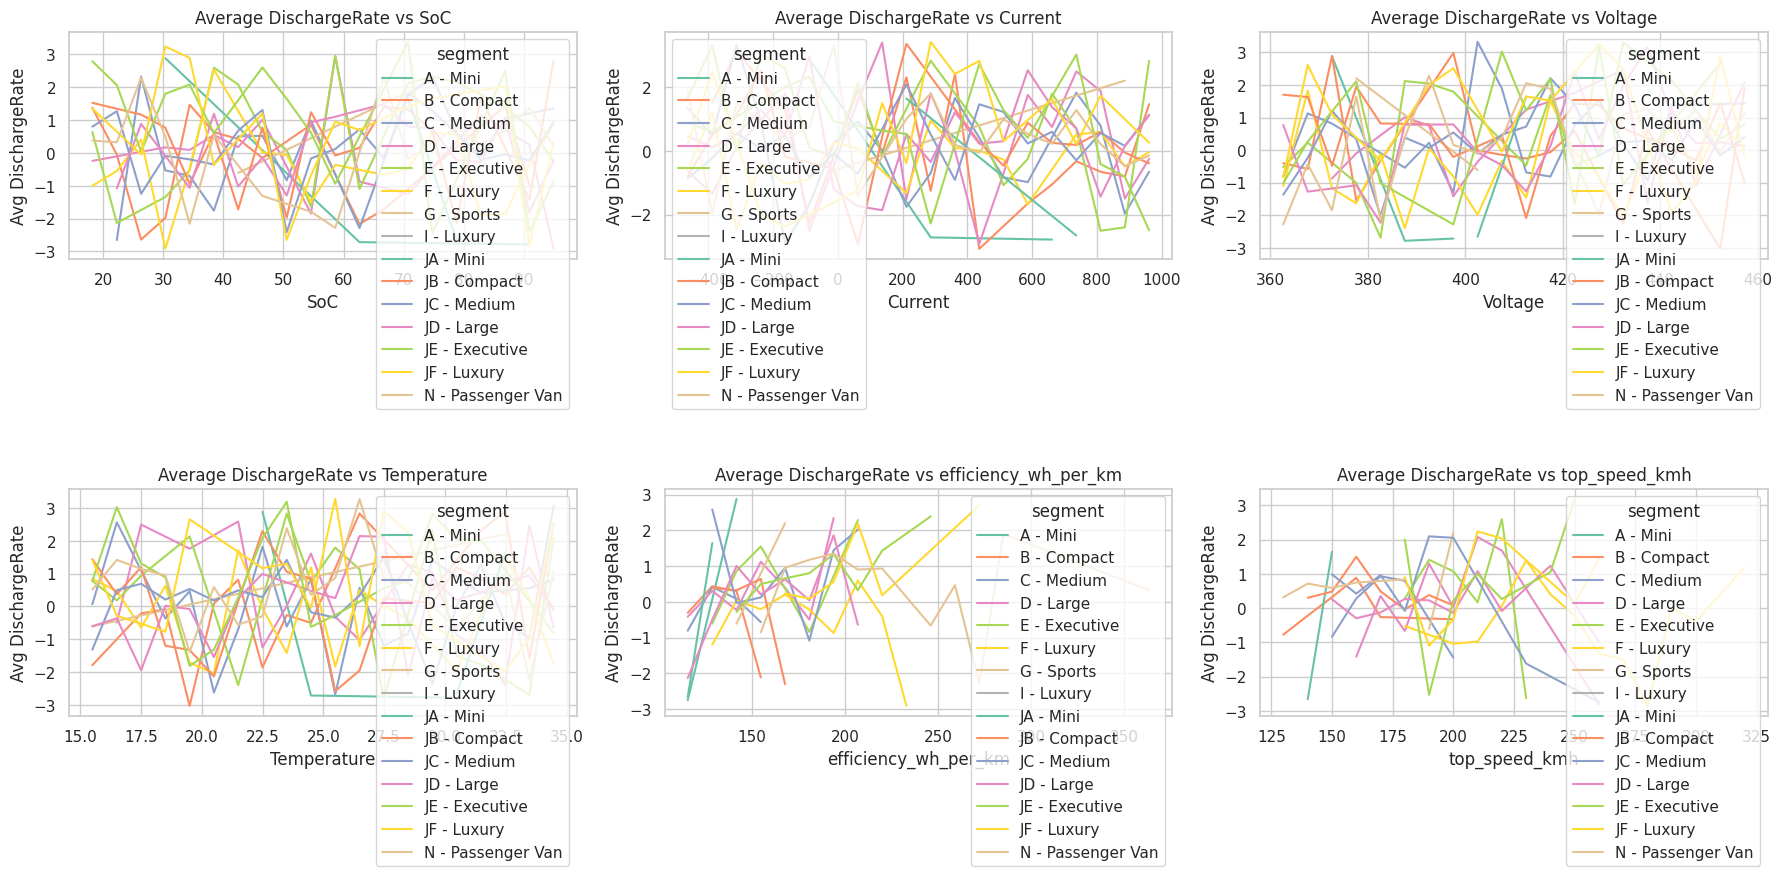

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define pairs to plot
plot_pairs = [
    ('SoC', 'DischargeRate'),
    ('Current', 'DischargeRate'),
    ('Voltage', 'DischargeRate'),
    ('Temperature', 'DischargeRate'),
    ('efficiency_wh_per_km', 'DischargeRate'),
    ('top_speed_kmh', 'DischargeRate')
]

# Set up the plot
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")

for i, (x, y) in enumerate(plot_pairs, 1):
    plt.subplot(3, 3, i)

    # Group by segment and bin the x-variable
    df['x_bin'] = pd.cut(df[x], bins=20)
    grouped = df.groupby(['segment', 'x_bin'])[y].mean().reset_index()

    # Convert bin midpoints for plotting
    grouped['x_mid'] = grouped['x_bin'].apply(lambda b: b.mid)

    # Plot lineplot
    sns.lineplot(data=grouped, x='x_mid', y=y, hue='segment', palette='Set2')
    plt.title(f'Average {y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(f'Avg {y}')
    plt.grid(True)

plt.tight_layout()
plt.show()


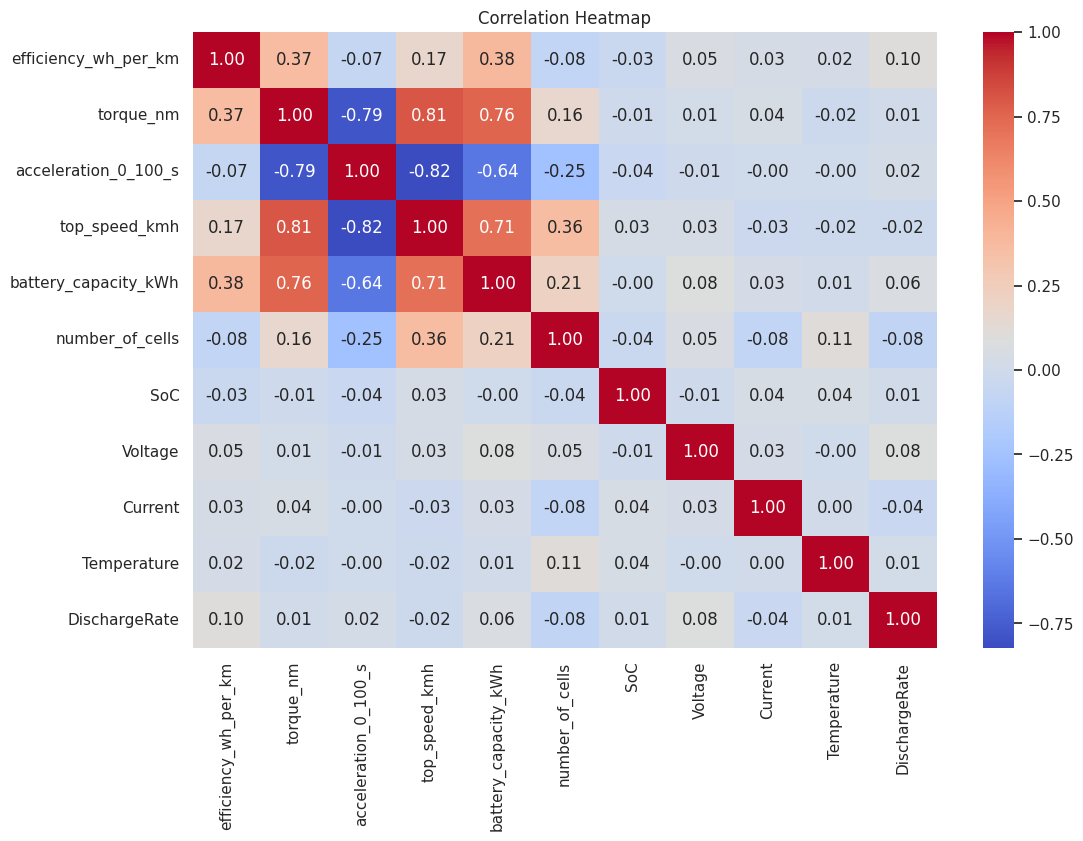

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Define features and target
features = [
    'efficiency_wh_per_km', 'torque_nm', 'acceleration_0_100_s',
    'drivetrain', 'top_speed_kmh', 'battery_capacity_kWh',
    'number_of_cells', 'segment', 'SoC', 'Voltage', 'Current',
    'Temperature'
]
target = 'DischargeRate'

X = df[features]
y = df[target]

# Step 2: Identify feature types
categorical_features = ['drivetrain', 'segment']
numeric_features = [f for f in features if f not in categorical_features]

# Step 3: Preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Fill NaNs with mean
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill NaNs with mode
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 4: Build pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train model
model.fit(X_train, y_train)

# Step 7: Predict discharge rate
y_pred = model.predict(X_test)

# Step 8: Estimate range
battery_capacity = X_test['battery_capacity_kWh'].fillna(X['battery_capacity_kWh'].mean()).values
y_pred_safe = np.clip(y_pred, 0.01, None)
estimated_range_km = battery_capacity / y_pred_safe

# Step 9: Output
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}')
print("r2 score:",r2_score(y_test, y_pred))
print(f'Estimated Range (first 5 samples): {estimated_range_km[:5]} km')


RMSE: 2.045
r2 score: -0.031499147874200606
Estimated Range (first 5 samples): [ 141.4593399   440.31105125   47.25850371  511.96159075 7700.        ] km


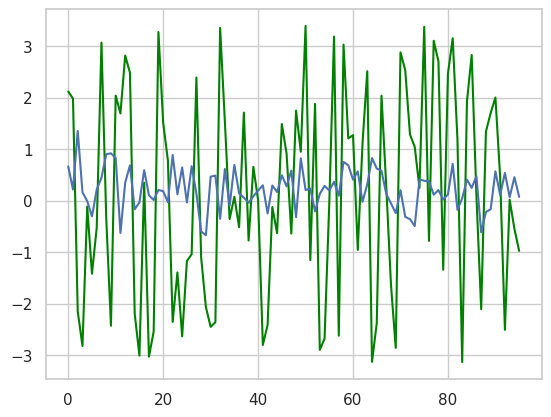

In [ ]:
plt.plot(y_test.values, label='Actual DischargeRate',color="green")
plt.plot(y_pred, label='Predicted DischargeRate')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Random Forest pipeline
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and predict
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest RMSE: {rmse_rf:.3f}')
print(f'Random Forest R² Score: {r2_rf:.3f}')

Random Forest RMSE: 2.049
Random Forest R² Score: -0.036


In [ ]:
from xgboost import XGBRegressor

# XGBoost pipeline
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
])

# Train and predict
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost RMSE: {rmse_xgb:.3f}')
print(f'XGBoost R² Score: {r2_xgb:.3f}')

XGBoost RMSE: 2.113
XGBoost R² Score: -0.101


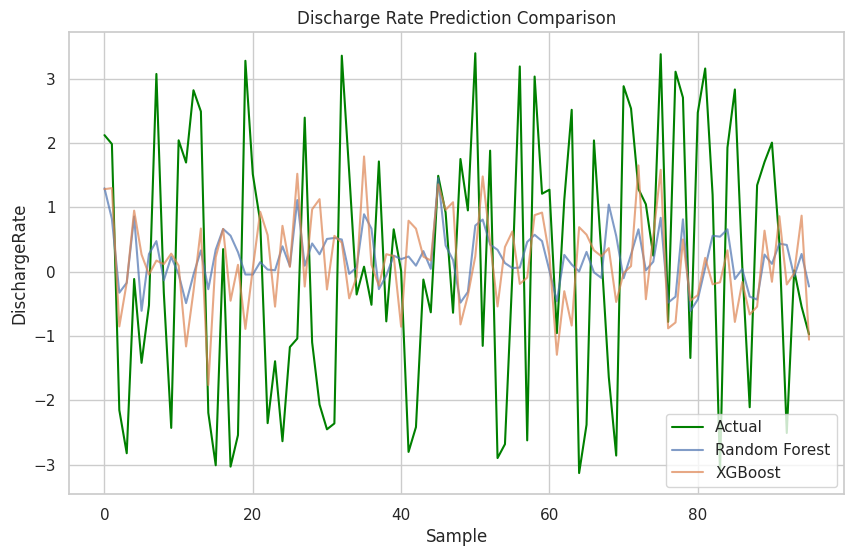

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='green')
plt.plot(y_pred_rf, label='Random Forest', alpha=0.7)
plt.plot(y_pred_xgb, label='XGBoost', alpha=0.7)
plt.title('Discharge Rate Prediction Comparison')
plt.xlabel('Sample')
plt.ylabel('DischargeRate')
plt.legend()
plt.grid(True)
plt.show()
